In [1]:
import numpy as np,pandas as pd,seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
data = pd.read_csv('D:\Datasets\spam.csv',encoding='latin-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'],axis=1, inplace=True)

In [6]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
data.rename(columns={'v1':'labels', 'v2':'message'}, inplace=True)

In [8]:
data['length'] = data['message'].apply(len)

In [9]:
data

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


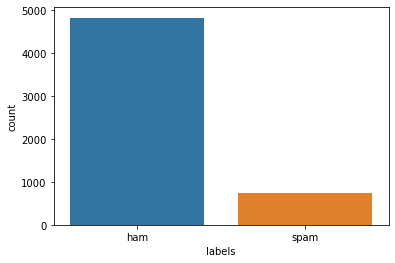

In [10]:
sns.countplot(data['labels'])

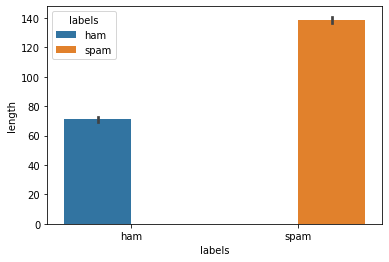

In [11]:
sns.barplot(x = data['labels'], y = data['length'], hue = data['labels'])

In [12]:
text = data['message'].copy()

In [13]:
from nltk.corpus import stopwords

In [14]:
import string
def text_filter(text):
    text = text.translate(str.maketrans('','',string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(text)

In [15]:
text = text.apply(text_filter)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [17]:
X = vectorizer.fit_transform(text)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
y = data['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

In [21]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [22]:
clfs = {'SVC': svc, 'KNC': knc, 'MNB': mnb, 'DTC': dtc, 'LRC': lrc, 'RFC': rfc, 'ABC': abc, 'BC': bc, 'ETC': etc}
clfs1 = {'SVC': svc, 'KNC': knc, 'MNB': mnb, 'DTC': dtc, 'LRC': lrc, 'RFC': rfc, 'ABC': abc, 'BC': bc, 'ETC': etc}
clfs2 = {'SVC': svc, 'KNC': knc, 'MNB': mnb, 'DTC': dtc, 'LRC': lrc, 'RFC': rfc, 'ABC': abc, 'BC': bc, 'ETC': etc}

In [23]:
def train_classifier(clf, X_train, y_train):
    clf.fit(X_train,y_train)

In [24]:
def predict_label(clf,X_test):
    return clf.predict(X_test)

In [25]:
pred_scores = []
for k,v in clfs.items():
    train_classifier(v,X_train,y_train)
    predicted = predict_label(v,X_test)
    clfs[k] =  accuracy_score(y_test,predicted)

In [26]:
clfs

{'SVC': 0.9755922469490309,
 'KNC': 0.927494615936827,
 'MNB': 0.9798994974874372,
 'DTC': 0.9612347451543432,
 'LRC': 0.9411342426417804,
 'RFC': 0.9698492462311558,
 'ABC': 0.9612347451543432,
 'BC': 0.9633883704235463,
 'ETC': 0.9705671213208902}

In [27]:
df = pd.DataFrame.from_dict(data = clfs,orient = 'index', columns = ['Score'])
df

,Score
SVC,0.975592
KNC,0.927495
MNB,0.979899
DTC,0.961235
LRC,0.941134
RFC,0.969849
ABC,0.961235
BC,0.963388
ETC,0.970567


Text(0.5, 1.0, 'Spam Detection Using Different Classifiers')

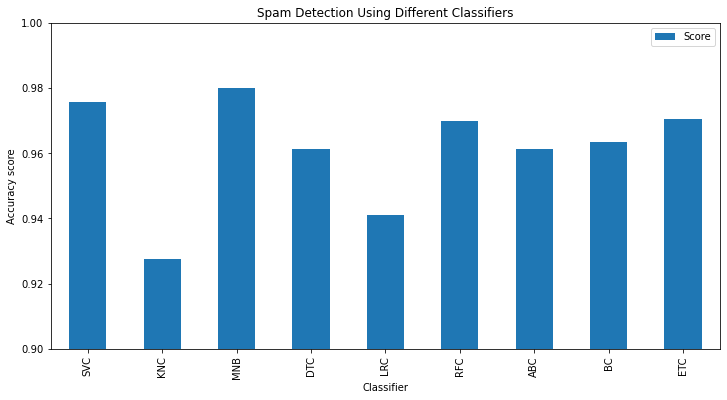

In [28]:
df.plot(kind = 'bar',ylim = (0.9,1.0), figsize=(12,6))
plt.xlabel('Classifier')
plt.ylabel('Accuracy score')
plt.title('Spam Detection Using Different Classifiers')

In [29]:
from nltk.stem import SnowballStemmer
def stemmer(text):
    text = text.split()
    words = ""
    for i in text:
        Stemmer = SnowballStemmer("english")
        words+= Stemmer.stem(i)
    return words

In [30]:
text = text.apply(stemmer)

In [31]:
X = vectorizer.fit_transform(text)
y = data['labels']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [33]:
for k,v in clfs1.items():
    train_classifier(v, X_train, y_train)
    predicted = predict_label(v, X_test)
    clfs1[k] = accuracy_score(y_test,predicted)

In [34]:
clfs1

{'SVC': 0.8732057416267942,
 'KNC': 0.861244019138756,
 'MNB': 0.9049043062200957,
 'DTC': 0.9019138755980861,
 'LRC': 0.867822966507177,
 'RFC': 0.8983253588516746,
 'ABC': 0.8744019138755981,
 'BC': 0.895933014354067,
 'ETC': 0.90311004784689}

In [35]:
df2 = pd.DataFrame.from_dict(data = clfs1, orient='index', columns = ['Score2'])

In [36]:
df2


,Score2
SVC,0.873206
KNC,0.861244
MNB,0.904904
DTC,0.901914
LRC,0.867823
RFC,0.898325
ABC,0.874402
BC,0.895933
ETC,0.903110


In [38]:
df = pd.concat([df,df2], axis = 1)
df

,Score,Score2
SVC,0.975592,0.873206
KNC,0.927495,0.861244
MNB,0.979899,0.904904
DTC,0.961235,0.901914
LRC,0.941134,0.867823
RFC,0.969849,0.898325
ABC,0.961235,0.874402
BC,0.963388,0.895933
ETC,0.970567,0.903110


Text(0.5, 1.0, 'Spam Detection Using Different Classifiers')

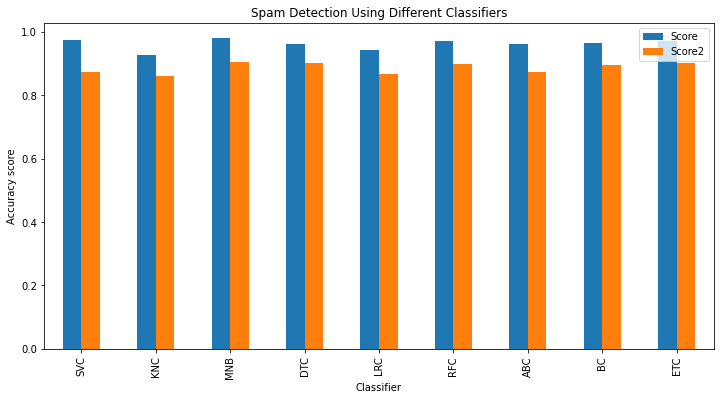

In [40]:
df.plot(kind = 'bar', figsize=(12,6))
plt.xlabel('Classifier')
plt.ylabel('Accuracy score')
plt.title('Spam Detection Using Different Classifiers')